In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#!pip install pywaffle --quiet
from wordcloud import WordCloud

from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
df = pd.read_csv("/content/drive/MyDrive/Proyecto Final IA/summer-products-with-rating-and-performance_2020-08.csv")
#/summer-products-with-rating-and-performance_2020-08.csv
print(df.columns)
print("\n")
print(df.shape)
#https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')


(1573, 43)


# Identificar una lista de atributos a utilizar:

Despues de realizar el EDA y de reflexionar acerca de que atributos podemos controlar realmente seleccionamos una lista de atributos con potencial de ser utilizados:

title,title_orig,price,retail_price,currency_buyer,uses_ad_boosts,tags,product_color,product_variation_size_id,product_variation_inventory,
shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,
merchant_info_subtitle,merchant_has_profile_picture,merchant_profile_picture,product_picture

In [99]:
interesting_features = ["product_color","product_variation_inventory","shipping_is_express","origin_country","price","uses_ad_boosts","rating","merchant_rating","merchant_rating_count","merchant_has_profile_picture","badge_product_quality","has_urgency_banner"]
interesting_features_asuming = ["units_sold","product_color","product_variation_inventory","shipping_is_express","origin_country","price","uses_ad_boosts","rating","merchant_rating","merchant_rating_count","merchant_has_profile_picture","badge_product_quality","has_urgency_banner",'rating_count','rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count']

Acerca de las varables que no podemos controlar, hay varias con se correlacionan bastante con la cantidad vendida, cómo lo son el rating_count y  los rating_x_count, pero dado que están por fuera de nuestro control, buscamos una manera de realacionaar esas variables con los tags.

In [100]:
df_interesting = df.loc[:,interesting_features]
print(df_interesting.columns)
print("\n")
print(df_interesting.shape)
print(df_interesting.info())

Index(['product_color', 'product_variation_inventory', 'shipping_is_express',
       'origin_country', 'price', 'uses_ad_boosts', 'rating',
       'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner'],
      dtype='object')


(1573, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_color                 1532 non-null   object 
 1   product_variation_inventory   1573 non-null   int64  
 2   shipping_is_express           1573 non-null   int64  
 3   origin_country                1556 non-null   object 
 4   price                         1573 non-null   float64
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   merchant_rating               1573 no

(1573, 12)


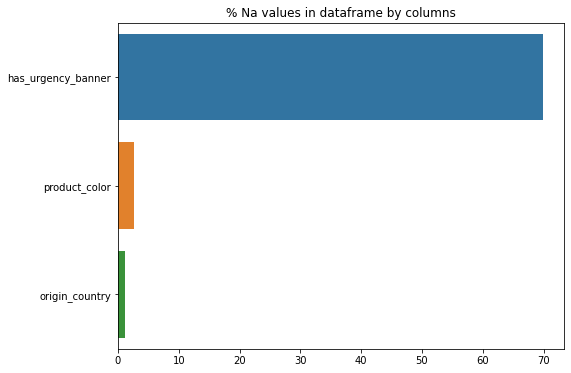

In [101]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False)*100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');
print(df_interesting.shape)
plot_missing_data(df_interesting)

In [102]:
nan_replace={'has_urgency_banner':0,'origin_country':'unknown','product_color':'multicolor'}
df_interesting.fillna(nan_replace,inplace=True)
df_interesting = df_interesting.dropna()
print(df_interesting.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_color                 1573 non-null   object 
 1   product_variation_inventory   1573 non-null   int64  
 2   shipping_is_express           1573 non-null   int64  
 3   origin_country                1573 non-null   object 
 4   price                         1573 non-null   float64
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   merchant_rating               1573 non-null   float64
 8   merchant_rating_count         1573 non-null   int64  
 9   merchant_has_profile_picture  1573 non-null   int64  
 10  badge_product_quality         1573 non-null   int64  
 11  has_urgency_banner            1573 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 159.8+ KB
Non

In [103]:
corr_map=df_interesting.corr()
print(corr_map["price"].sort_values(ascending=False))
# plt.figure(figsize=(20,12))
# sns.heatmap(corr_map,annot=True,cmap='Blues')
# plt.xticks(rotation=45,fontsize=14)
# plt.yticks(rotation=45,fontsize=14)
# plt.show()

price                           1.000000
product_variation_inventory     0.274819
shipping_is_express             0.146751
rating                          0.053469
merchant_rating                 0.047121
merchant_has_profile_picture    0.017612
badge_product_quality           0.009512
has_urgency_banner             -0.021222
merchant_rating_count          -0.023790
uses_ad_boosts                 -0.073269
Name: price, dtype: float64


# Ajuste de las variables:

A partir de las variables que tenemos, intentaremos hacer ajustes para ayudar al modelamiento.

Identifiquemos los colores que más venden y realizemos una clasificación en donde pongamos a los colores menos relevantes en una catégoria propia.

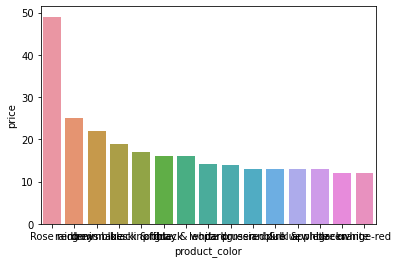

In [104]:
color_sale= df_interesting.groupby('product_color')['price'].mean()
color_sale= color_sale.reset_index().sort_values(by='price',ascending=False)
top_10 = color_sale.head(15)
sns.barplot(data=top_10,x='product_color',y='price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



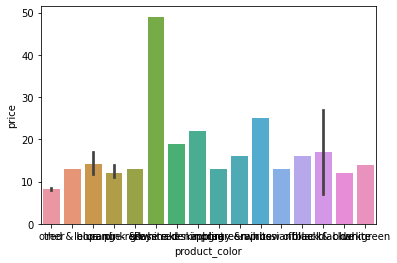

In [105]:
#Ponemos los otros colores en other, para eliminar ruido
top_10_vals = top_10.product_color.values
df_interesting['product_color'][-df_interesting['product_color'].isin(top_10_vals)]='other'
sns.barplot(data=df_interesting,x='product_color',y='price')

Ahora realizaremos una codificación onehot, para convertir todas las variables categoricas en varias columnas de valores enteros binarios

In [106]:
from sklearn.preprocessing import OneHotEncoder

print(df_interesting.columns)
categories = df_interesting.loc[:,['product_color','origin_country']]
encoder = OneHotEncoder(sparse=False)
categories_1hot = pd.DataFrame(encoder.fit_transform(categories))
new_categories_nms = np.concatenate([encoder.categories_[0],encoder.categories_[1]])
categories_1hot.columns = new_categories_nms
print(categories_1hot.info())
df_interesting = pd.concat([df_interesting,categories_1hot],axis=1).drop(['product_color','origin_country'], axis= 1)
print(df_interesting.info())

Index(['product_color', 'product_variation_inventory', 'shipping_is_express',
       'origin_country', 'price', 'uses_ad_boosts', 'rating',
       'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rose red            1573 non-null   float64
 1   applegreen          1573 non-null   float64
 2   black & blue        1573 non-null   float64
 3   blackwhite          1573 non-null   float64
 4   darkgreen           1573 non-null   float64
 5   denimblue           1573 non-null   float64
 6   gray & white        1573 non-null   float64
 7   greysnakeskinprint  1573 non-null   float64
 8   leopard             1573 non-null   float64
 9   offblack            1573 non-null   float6

En esta parte agrgaremos 2 columnas que se relacionan con los tags:


*   best_tag_units_sold: Escogemos el valor del tag con las mejores ventas promedio
*   Elemento de lista: Calculamos el promedio del promedio de las ventas de todos los tag



In [107]:
dic_tags_uts = {}

df_search = df.loc[:,["tags","price"]]
#print(df_search)
df_search = df_search.values
for row in df_search:
  #print(row)
  tags = row[0].split(",")
  units = row[1]
  for tag in tags:
    if(tag in dic_tags_uts):
      dic_tags_uts[tag].append(units)
    else:
      dic_tags_uts[tag] = [units]

print(dic_tags_uts)

{'Summer': [16.0, 8.0, 8.0, 8.0, 2.72, 3.92, 12.0, 11.0, 5.78, 5.79, 6.0, 1.91, 5.79, 2.0, 11.0, 11.0, 9.0, 7.0, 5.0, 11.0, 7.0, 5.71, 9.0, 9.0, 1.74, 5.65, 14.0, 5.65, 8.0, 9.0, 11.0, 14.0, 5.8, 13.0, 7.0, 12.0, 3.69, 5.84, 16.0, 9.0, 7.0, 11.0, 5.84, 1.0, 11.0, 9.0, 6.0, 1.0, 9.0, 6.0, 11.0, 7.0, 5.0, 2.72, 5.87, 11.0, 8.0, 14.0, 2.0, 8.0, 5.79, 8.0, 4.94, 8.0, 11.0, 9.0, 7.0, 11.0, 8.0, 5.83, 8.0, 5.77, 5.9, 6.0, 7.0, 8.0, 12.0, 12.0, 11.0, 8.0, 11.0, 9.0, 1.72, 1.86, 14.0, 3.69, 5.79, 9.0, 6.0, 20.0, 5.66, 8.0, 8.0, 11.0, 7.0, 11.0, 5.8100000000000005, 5.0, 5.0, 11.0, 12.0, 5.68, 11.0, 7.0, 12.0, 7.0, 7.0, 11.0, 12.0, 13.0, 2.72, 6.0, 9.0, 5.0, 5.86, 2.0, 7.0, 5.66, 13.0, 8.0, 11.0, 11.0, 11.0, 14.0, 7.0, 12.0, 2.0, 6.0, 8.0, 8.0, 11.0, 3.66, 1.68, 13.0, 13.0, 11.0, 7.0, 4.8100000000000005, 9.0, 18.0, 7.0, 16.0, 5.0, 1.68, 6.0, 13.0, 11.0, 7.0, 12.0, 6.0, 6.0, 8.0, 8.0, 11.0, 6.0, 11.0, 9.0, 8.0, 3.78, 8.0, 6.0, 8.0, 9.0, 3.0, 8.0, 5.74, 3.67, 8.0, 11.0, 8.0, 22.0, 8.0, 11.0, 6.0, 

In [108]:
#Vamos a crear un nuevo diccionario donde solo se guarden los promedios

for elem in dic_tags_uts:
  arr_tmp = np.array(dic_tags_uts[elem])
  dic_tags_uts[elem] = arr_tmp.mean()

print(dic_tags_uts)

{'Summer': 8.186101438304314, 'Fashion': 8.080573012939002, 'womenunderwearsuit': 16.0, 'printedpajamasset': 16.0, 'womencasualshort': 15.0, "Women's Fashion": 8.205467680608365, 'flamingo': 13.5, 'loungewearset': 16.0, 'Casual': 7.846696132596684, 'Shirt': 7.441601423487545, 'casualsleepwear': 16.0, 'Shorts': 8.638000000000002, 'flamingotshirt': 16.0, 'Elastic': 6.657500000000001, 'Vintage': 10.22, 'Tops': 7.2974950690335305, 'tshirtandshortsset': 16.0, 'Women': 8.133361082206035, 'Sleepwear': 8.702727272727273, 'Print': 8.113614864864866, 'womenpajamasset': 16.0, 'womennightwear': 16.0, 'Pajamas': 8.790000000000001, 'womensleepwearset': 16.0, 'Mini': 8.591646341463417, 'womens dresses': 7.8414285714285725, 'Patchwork': 6.697272727272727, 'fashion dress': 9.288, 'Dress': 9.009453551912568, 'Mini dress': 8.876000000000001, 'Women S Clothing': 8.51655172413793, 'backless': 9.21653846153846, 'party': 9.014573643410854, 'summer dresses': 8.688285714285715, 'sleeveless': 7.564137931034484,

In [109]:
#Crear las listas que vamos a agregar al dataset

grt_tag_price_list = []
avrg_tag_price_list = []

df_search = df.loc[:,["tags","units_sold"]]
#print(df_search)
df_search = df_search.values
for row in df_search:
  #print(row)
  tags = row[0].split(",")
  best_tag = tags[0]
  best_tag_val = dic_tags_uts[best_tag]
  avrg_tag_val = 0

  for tag in tags:
    val = dic_tags_uts[tag]
    if(best_tag_val< val):
      best_tag = tag
      best_tag_val = val
    avrg_tag_val += val
  
  avrg_tag_val /= len(tags)
  grt_tag_price_list.append(best_tag_val)
  avrg_tag_price_list.append(avrg_tag_val)

In [110]:
#Concatenar las nuevas columnas al data frame

df_interesting["grt_tag_price"] = grt_tag_price_list
df_interesting["avrg_tag_price"] = avrg_tag_price_list

print(df_interesting.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 1572
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_variation_inventory   1573 non-null   int64  
 1   shipping_is_express           1573 non-null   int64  
 2   price                         1573 non-null   float64
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   merchant_rating               1573 non-null   float64
 6   merchant_rating_count         1573 non-null   int64  
 7   merchant_has_profile_picture  1573 non-null   int64  
 8   badge_product_quality         1573 non-null   int64  
 9   has_urgency_banner            1573 non-null   float64
 10  Rose red                      1573 non-null   float64
 11  applegreen                    1573 non-null   float64
 12  black & blue                  1573 non-null   float64
 13  bla

In [111]:
print(df_interesting.corr()["price"].sort_values(ascending=False))

price                           1.000000
grt_tag_price                   0.712445
avrg_tag_price                  0.700968
product_variation_inventory     0.274819
Rose red                        0.260987
shipping_is_express             0.146751
rainbow                         0.106992
denimblue                       0.087743
black & blue                    0.078741
leopard                         0.076103
greysnakeskinprint              0.068493
rating                          0.053469
offblack                        0.049244
gray & white                    0.049244
merchant_rating                 0.047121
applegreen                      0.042432
pink & white                    0.042432
orange-red                      0.040864
US                              0.038658
darkgreen                       0.036411
prussianblue                    0.029995
red & blue                      0.029995
blackwhite                      0.023578
CN                              0.021330
merchant_has_pro

# Creación de modelos

Lo primero es seperar el dataset en tres:
*   Conjunto de entrenamiento
*   Conjunto de selección de hiper parametros
*   Conjunto de prueba






In [112]:
from sklearn.model_selection import train_test_split
X=df_interesting.drop(['price'],axis=1)
Y=df_interesting['price'].astype(int)
trainig_size = 0.6
testing_size = 1-trainig_size
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testing_size, random_state=random_seed,shuffle=True)
X_test, X_test_hp, y_test, y_test_hp = train_test_split(X, Y, test_size=0.5, random_state=random_seed,shuffle=True)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import Pipeline


base_models = [('DT_model',DecisionTreeClassifier(random_state=random_seed)),
            ('RF_model',RandomForestClassifier(random_state=random_seed,n_jobs=-1)),
            ('LR_model',LogisticRegression(random_state=random_seed,n_jobs=-1)),
            ("XGB_model", XGBClassifier(random_state=random_seed, n_jobs=-1)),
             ("ETR_model", ExtraTreesRegressor(n_estimators=20, random_state=random_seed))]
# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4
split = KFold(n_splits=kfolds,shuffle=True,random_state=random_seed)

# Preprocessing, fitting, making predictions and scoring for every model:
for name,model in base_models:
    temp_model = Pipeline(steps=[('model',model)])
    temp_model.fit(X_train, y_train)
    cv_results = cross_val_score(temp_model,X_train,y_train,cv=split,n_jobs=-1)
    # output:
    min_score = round(min(cv_results),4)
    max_score = round(max(cv_results),4)
    mean_score = round(np.mean(cv_results),4)
    std_dev = round(np.std(cv_results),4)
    print(f'{name} cross validation accuracy score:{mean_score} +- {std_dev} (std) min:{min_score},max:{max_score}')

DT_model cross validation accuracy score:0.2916 +- 0.013 (std) min:0.2797,max:0.3106
RF_model cross validation accuracy score:0.3245 +- 0.0242 (std) min:0.2839,max:0.3475
LR_model cross validation accuracy score:0.157 +- 0.0162 (std) min:0.1356,max:0.178
XGB_model cross validation accuracy score:0.3574 +- 0.0239 (std) min:0.322,max:0.3814
ETR_model cross validation accuracy score:0.6492 +- 0.037 (std) min:0.6131,max:0.7025


# Ajuste de hiper parametros

Index(['product_variation_inventory', 'shipping_is_express', 'uses_ad_boosts',
       'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner', 'Rose red', 'applegreen', 'black & blue',
       'blackwhite', 'darkgreen', 'denimblue', 'gray & white',
       'greysnakeskinprint', 'leopard', 'offblack', 'orange-red', 'other',
       'pink & white', 'prussianblue', 'rainbow', 'red & blue', 'AT', 'CN',
       'GB', 'SG', 'US', 'VE', 'unknown', 'grt_tag_price', 'avrg_tag_price'],
      dtype='object')
[1.04378977e-04 1.03225156e-06 7.64135021e-04 1.61884967e-02
 6.25790789e-03 9.22545900e-01 4.42335127e-03 1.73885529e-02
 7.67391053e-06 5.71967659e-10 1.03554864e-13 7.47034968e-11
 3.30890466e-11 0.00000000e+00 0.00000000e+00 2.22359974e-13
 1.27450518e-10 1.48829534e-11 0.00000000e+00 2.69413022e-07
 1.19447884e-06 1.77821009e-13 2.87833655e-11 0.00000000e+00
 1.18236701e-10 0.00000000e+00 9.01163725e-03

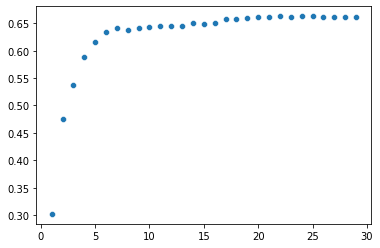

In [114]:
# temp_model = 
# temp_model.fit(X_test_hp, y_tes_hp)
# cv_results = cross_val_score(temp_model,X_train,y_train,cv=split,n_jobs=-1)
# # output:
# min_score = round(min(cv_results),4)
# max_score = round(max(cv_results),4)
# mean_score = round(np.mean(cv_results),4)
# std_dev = round(np.std(cv_results),4)
# print(f'{name} cross validation accuracy score:{mean_score} +- {std_dev} (std) min:{min_score},max:{max_score}')

x_vals = []
y_scores = []
#X_test.drop("prediction",axis=1)
for i in range(1,30):
  temp_model = ExtraTreesRegressor(n_estimators=i, random_state=random_seed)
  temp_model.fit(X_train, X_train)
  cv_results = cross_val_score(temp_model,X_test_hp, y_test_hp,cv=split,n_jobs=-1)
  y_predict = cv_results.mean()
  x_vals.append(i)
  y_scores.append(y_predict)

sns.scatterplot(x=x_vals,y=y_scores)
#print(y_scores)
print(X_test_hp.columns)
print(temp_model.feature_importances_)

Index(['product_variation_inventory', 'shipping_is_express', 'uses_ad_boosts',
       'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner', 'Rose red', 'applegreen', 'black & blue',
       'blackwhite', 'darkgreen', 'denimblue', 'gray & white',
       'greysnakeskinprint', 'leopard', 'offblack', 'orange-red', 'other',
       'pink & white', 'prussianblue', 'rainbow', 'red & blue', 'AT', 'CN',
       'GB', 'SG', 'US', 'VE', 'unknown', 'grt_tag_price', 'avrg_tag_price'],
      dtype='object')
[0.0797088  0.         0.03942344 0.13561886 0.14836554 0.13831855
 0.01948074 0.01473516 0.01819244 0.         0.         0.00116814
 0.00077876 0.         0.         0.         0.         0.
 0.         0.00157749 0.00233629 0.         0.         0.
 0.         0.         0.0040885  0.         0.         0.
 0.         0.         0.22445891 0.17174838]


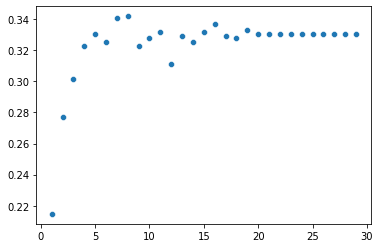

In [116]:
x_vals = []
y_scores = []
#X_test.drop("prediction",axis=1)
for i in range(1,30):
  temp_model = DecisionTreeClassifier(random_state=random_seed,max_depth=i)
  temp_model.fit(X_train, y_train)
  cv_results = cross_val_score(temp_model,X_test_hp, y_test_hp,cv=split,n_jobs=-1)
  y_predict = cv_results.mean()
  x_vals.append(i)
  y_scores.append(y_predict)

sns.scatterplot(x=x_vals,y=y_scores)
print(X_test_hp.columns)
print(temp_model.feature_importances_)

Index(['product_variation_inventory', 'shipping_is_express', 'uses_ad_boosts',
       'rating', 'merchant_rating', 'merchant_rating_count',
       'merchant_has_profile_picture', 'badge_product_quality',
       'has_urgency_banner', 'Rose red', 'applegreen', 'black & blue',
       'blackwhite', 'darkgreen', 'denimblue', 'gray & white',
       'greysnakeskinprint', 'leopard', 'offblack', 'orange-red', 'other',
       'pink & white', 'prussianblue', 'rainbow', 'red & blue', 'AT', 'CN',
       'GB', 'SG', 'US', 'VE', 'unknown', 'grt_tag_price', 'avrg_tag_price'],
      dtype='object')
[0.13037983 0.         0.06523166 0.06328519 0.0483555  0.05127511
 0.06091392 0.04865225 0.07971594 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.07250414 0.         0.         0.
 0.         0.09860715 0.16826573 0.11281355]


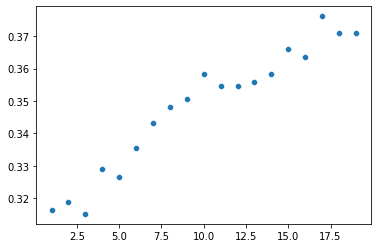

In [118]:
 x_vals = []
y_scores = []
#X_test.drop("prediction",axis=1)
for i in range(1,20):
  temp_model = XGBClassifier(random_state=random_seed, n_jobs=-1,n_estimators = i)
  temp_model.fit(X_train, y_train)
  cv_results = cross_val_score(temp_model,X_test_hp, y_test_hp,cv=split,n_jobs=-1)
  y_predict = cv_results.mean()
  x_vals.append(i)
  y_scores.append(y_predict)

sns.scatterplot(x=x_vals,y=y_scores)
#print(y_scores)
print(X_test_hp.columns)
print(temp_model.feature_importances_)